## Observations and Insights 

The purpose of this study is to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. Over the course of 45 days, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens and the tumor development was observed and measured. After the analysis of all the data,  the following three observations can be generated:
1. Based on the Summary Statistics table generated for each drug regimen, Capomulin has a much smaller average of Tumor Volume compared to the rest of the drug regime. Same pattern appears for the median and mode of tumor volume of Capomulin. This indicates that Capomulin has the better performance on treating the SCC tumor than other drug regimen
2. Based on the bar chart, pie chart and boxplot generated , it can be observed that the total number of unique mice that are tested on each drug is about the same and the distribution of female or male mice in the study is roughly equal. There are only outlier existing in the test results is on the  Infubinol regimen. Therefore, the test result obtained should be valid and there isn't any other factors that might affecting the performance of Capomulin regimen.
3. Based on the correlation coefficient and scatter plot generated for mouse weight and average tumor volume for the Capomulin regimen, it is conclude that there is a strong positive linear relationship between these two factors. Roughly as the mouse weight increase by one gram, the average tumor volume for the Capomulin regin will be increased by one cubic milliliter.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
pymaceuticals_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(pymaceuticals_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = pymaceuticals_data.loc[pymaceuticals_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_data

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = pymaceuticals_data.loc[pymaceuticals_data['Mouse ID'] == 'g989']
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = pymaceuticals_data[pymaceuticals_data["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen = cleaned_data.groupby("Drug Regimen")
summary_statistics = pd.DataFrame({
    "Mean" : drug_regimen["Tumor Volume (mm3)"].mean(),
    "Median" : drug_regimen["Tumor Volume (mm3)"].median(),
    "Variance" : drug_regimen["Tumor Volume (mm3)"].var(),
    "Standard Deviation" : drug_regimen["Tumor Volume (mm3)"].std(),
    "Standard Error of Mean (SEM)" : drug_regimen["Tumor Volume (mm3)"].sem()
})
summary_statistics

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
functions = ["mean", "median","var","std","sem"]
rename_columns = {"mean" : "Mean", 
          "median" : "Median",
          "var" : "Variance", 
          "std" : "Standard Deviation",
          "sem" : "Standard Error of Mean (SEM)"
}
summary_statistics2 = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(functions).rename(columns = rename_columns)
summary_statistics2

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

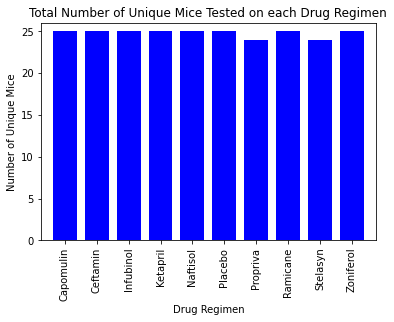

In [9]:
# Use groupby to get number of unique mice tested on each drug regimen 
mice_vs_regimen = cleaned_data.groupby("Drug Regimen")["Mouse ID"].nunique()

# Generate and format a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_bar_graph = mice_vs_regimen.plot(kind = "bar", color = "blue", width =0.75, align = "center")
regimen_bar_graph.set_xlabel("Drug Regimen")
regimen_bar_graph.set_ylabel("Number of Unique Mice")
regimen_bar_graph.set_title("Total Number of Unique Mice Tested on each Drug Regimen")
plt.xlim(-0.75, len(mice_vs_regimen) - 0.25)
plt.ylim(0, 26)
plt.show()

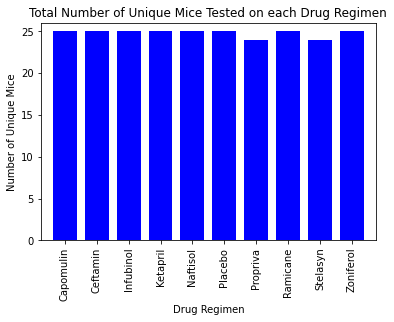

In [10]:
# Convert the mice_vs_regimen Series into a DataFrame and reset its index
mice_vs_regimen_df = pd.DataFrame(mice_vs_regimen)
mice_vs_regimen_df = mice_vs_regimen_df.reset_index()

# Generate and format a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = range(0, len(mice_vs_regimen_df["Drug Regimen"]))
plt.bar(x_axis, mice_vs_regimen_df["Mouse ID"], color = "blue", width =0.75, align = "center")
plt.xticks(x_axis, mice_vs_regimen_df["Drug Regimen"], rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.title("Total Number of Unique Mice Tested on each Drug Regimen")
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, 26)
plt.show()

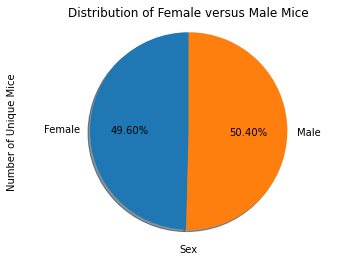

In [11]:
# Use groupby to get number of unique mice for different sex or gender
female_vs_male = cleaned_data.groupby("Sex")["Mouse ID"].nunique()

# Generate and format a pie plot showing the distribution of female versus male mice using pandas
sex_bar_graph = female_vs_male.plot(kind = "pie", autopct = "%1.2f%%", shadow = True, startangle = 90)
sex_bar_graph.set_xlabel("Sex")
sex_bar_graph.set_ylabel("Number of Unique Mice")
sex_bar_graph.set_title("Distribution of Female versus Male Mice")
plt.axis("equal")
plt.show()

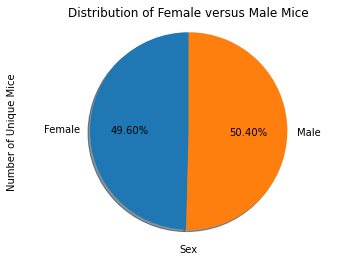

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(female_vs_male, labels = labels, autopct = "%1.2f%%", shadow = True, startangle = 90)
plt.axis("equal")
plt.xlabel("Sex")
plt.ylabel("Number of Unique Mice")
plt.title("Distribution of Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_timepoint = pd.DataFrame(cleaned_data.groupby("Mouse ID")["Timepoint"].max())
mouse_greatest_timepoint = mouse_greatest_timepoint.rename(columns = {"Timepoint" : "Last Timepoint"})

In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(cleaned_data, mouse_greatest_timepoint, on = "Mouse ID", how = "outer")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [15]:
# Put four treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting) and a empty list to fill with outliers we found
tumor_volume_data = []
outlier = []

# Put the list that contains four treatments into a for loop
for regimen in treatments:
    # Locate the rows which contain mice on each drug and their corresponding final tumor volumes
    new_df = merged_data[(merged_data["Drug Regimen"] == regimen) & (merged_data["Last Timepoint"] == merged_data["Timepoint"])]
    # Add the final tumor volumes on each drug to the empty list created above
    tumor_volume_data.append(new_df["Tumor Volume (mm3)"])
    # Calculate the first, second, and third quantitle, interquantile range (IQR), and lower and upper boundary to find outliers
    first_quantile = new_df["Tumor Volume (mm3)"].quantile(0.25)
    second_quantile = new_df["Tumor Volume (mm3)"].quantile(0.5)
    third_quantile = new_df["Tumor Volume (mm3)"].quantile(0.75)
    IQR = third_quantile - first_quantile
    lower_boundary = first_quantile - (1.5*IQR)
    upper_boundary = third_quantile + (1.5*IQR)
    # Determine if there is any outliers using the lower and upper boundary and add that to the empty outlier list created above
    outlier.append(new_df.loc[(new_df["Tumor Volume (mm3)"] < lower_boundary) | (new_df["Tumor Volume (mm3)"] > upper_boundary),
                              "Tumor Volume (mm3)"])

# Display the outliers
outlier

[Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 669    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64)]

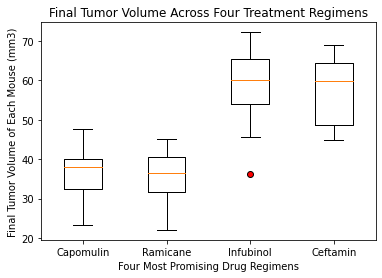

In [16]:
# Generate and format a box plot of the final tumor volume of each mouse across four regimens of interest
fig,ax = plt.subplots()
ax.boxplot(tumor_volume_data, flierprops = dict(markerfacecolor = "red", marker = "o"))
ax.set_xticklabels(treatments)
ax.set_xlabel("Four Most Promising Drug Regimens")
ax.set_ylabel("Final Tumor Volume of Each Mouse (mm3)")
ax.set_title("Final Tumor Volume Across Four Treatment Regimens")
plt.show()

## Line and Scatter Plots

In [17]:
# Locate all the rows which contain the drug regimen used is Capomulin
Capomulin = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
Capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [18]:
# Choose one mouse from the Capomulin data above (here I chose Mouse s185) and locate its timepoint and tumor volume
Mouse_s185 = cleaned_data.loc[cleaned_data["Mouse ID"] == "s185", ["Timepoint", "Tumor Volume (mm3)"]]
Mouse_s185

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


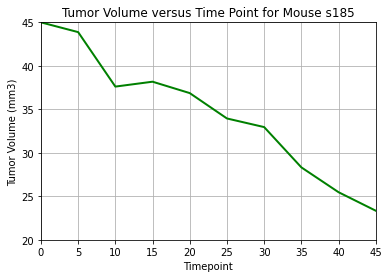

In [19]:
# Generate and format a line plot of tumor volume vs. time point for a mouse treated with Capomulin (here is mouse s185) 
plt.plot(Mouse_s185["Timepoint"], Mouse_s185["Tumor Volume (mm3)"], color = "green", linewidth = 2)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume versus Time Point for Mouse s185")
plt.xlim(0,45)
plt.ylim(20,45)
plt.grid()
plt.show()

In [20]:
# Groupby the data by Mouse ID and finding the average for each mouse"s weight and tumor volume for plotting
capomulin_mouses = Capomulin.groupby("Mouse ID").mean()
volume_vs_weight = capomulin_mouses[["Weight (g)","Tumor Volume (mm3)"]]
volume_vs_weight.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


Text(0.5, 1.0, 'Average Tumor Volume versus Mouse Weight for the Capomulin Regimen')

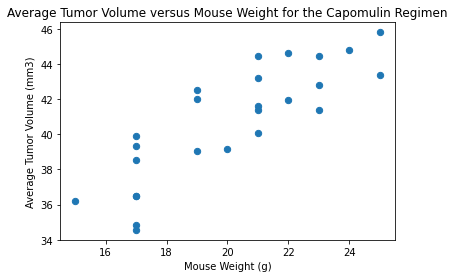

In [21]:
# Generate and Format a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen using matplotlib
x_axis = volume_vs_weight["Weight (g)"]
plt.scatter(x_axis,volume_vs_weight["Tumor Volume (mm3)"], marker ="o",s = 40)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume versus Mouse Weight for the Capomulin Regimen")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
r_value, p_value = st.pearsonr(volume_vs_weight["Weight (g)"],volume_vs_weight["Tumor Volume (mm3)"])
r_value

0.8419363424694717

In [23]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
regression = st.linregress(volume_vs_weight["Weight (g)"],volume_vs_weight["Tumor Volume (mm3)"])
regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [24]:
# Generate the regression line by the linear regression model calculated above
regression_line = regression[0] * x_axis + regression[1]

Text(0.5, 1.0, 'Average Tumor Volume versus Mouse Weight for the Capomulin Regimen')

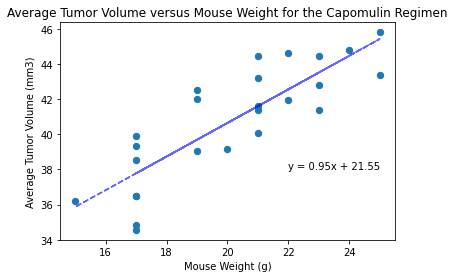

In [25]:
#Plot the linear regression model on top of the previous scatter plot.
x_axis = volume_vs_weight["Weight (g)"]
plt.scatter(x_axis,volume_vs_weight["Tumor Volume (mm3)"], marker ="o",s = 40)
plt.plot(x_axis, regression_line, "b--", alpha = 0.6)
plt.annotate("y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2)), (22,38))
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume versus Mouse Weight for the Capomulin Regimen")